#### Procesamiento de Señales
# Tarea Semanal 3 parte 1
#### Santiago Naso

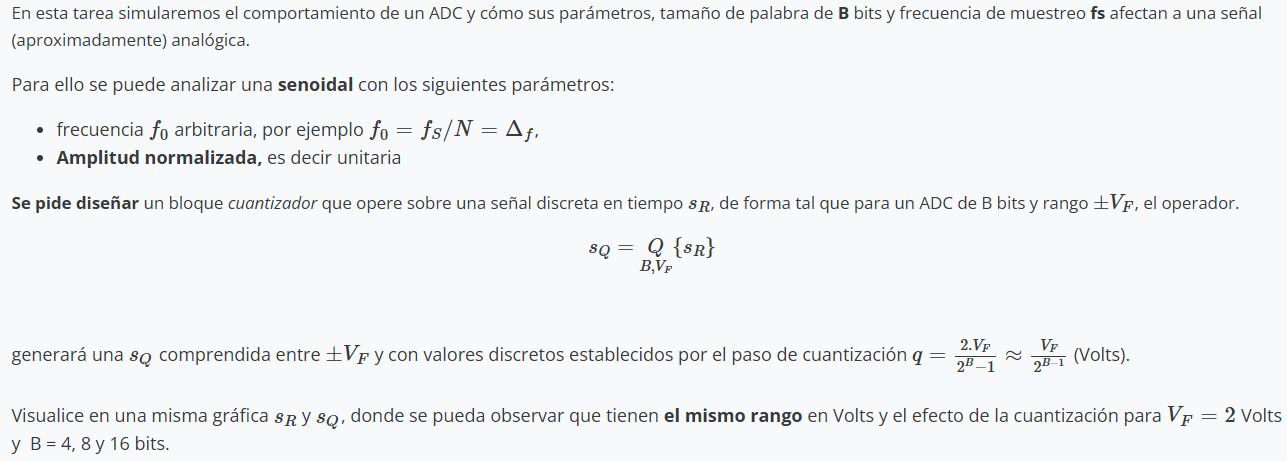

# Código en Phython


[Análisis del error - 4 bits]
Paso de cuantización q = 0.250000
Media del error real: 4.88498e-18
Varianza del error real: 6.04111e-03
Varianza teórica (q²/12): 5.20833e-03
Correlación error-señal: 8.72944e-03

[Análisis del error - 8 bits]
Paso de cuantización q = 0.015625
Media del error real: 5.02376e-18
Varianza del error real: 2.15555e-05
Varianza teórica (q²/12): 2.03451e-05
Correlación error-señal: -1.83461e-05

[Análisis del error - 16 bits]
Paso de cuantización q = 0.000061
Media del error real: 5.02578e-18
Varianza del error real: 3.41842e-10
Varianza teórica (q²/12): 3.10441e-10
Correlación error-señal: -9.67155e-08


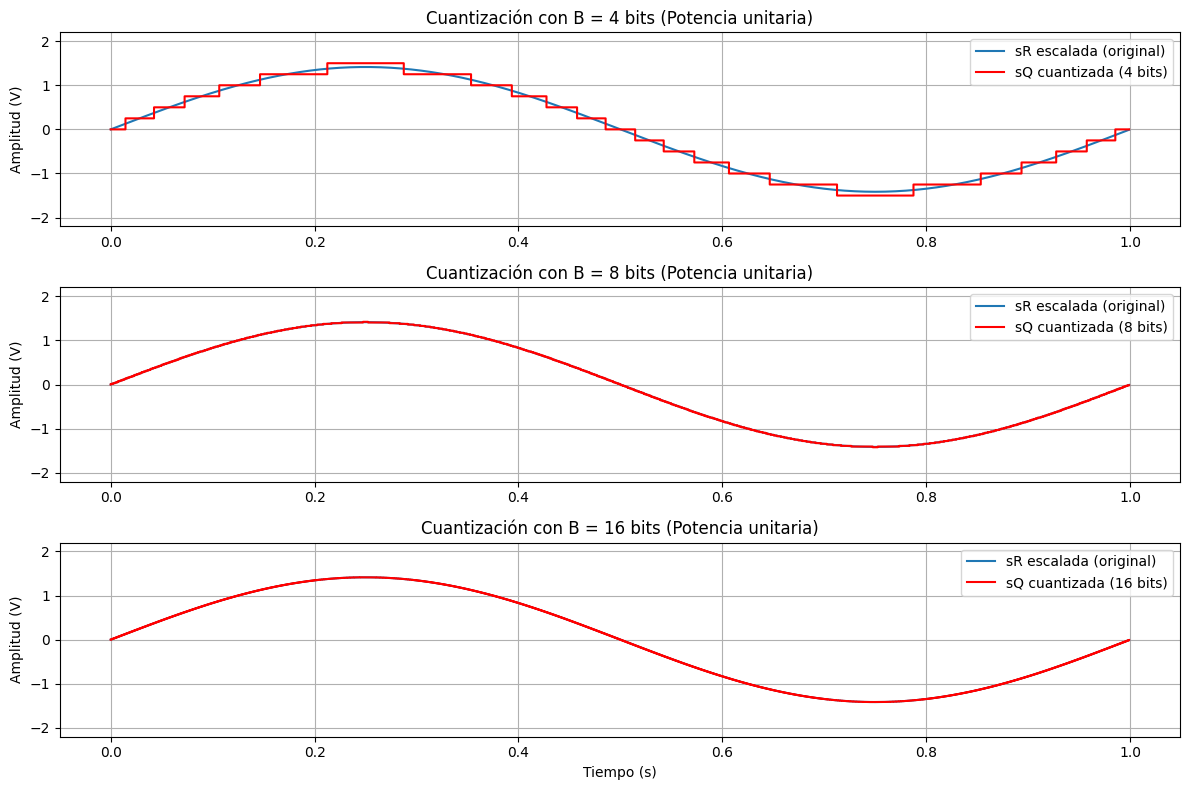

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue May  6 11:27:55 2025

@author: Usuario
"""

import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    """
    Genera una señal senoidal parametrizable.
    
    Parámetros:
    vmax : Amplitud máxima de la senoidal (volts)
    dc   : Valor medio (volts)
    ff   : Frecuencia de la señal (Hz)
    ph   : Fase de la señal (radianes)
    nn   : Cantidad de muestras digitalizadas por el ADC
    fs   : Frecuencia de muestreo del ADC (Hz)
    
    Retorna:
    tt : Vector de tiempos (s)
    xx : Vector de valores de la señal
    """
    tt = np.arange(0, nn / fs, 1 / fs)  # Vector de tiempo
    """
    DeltaF = fs/nn : Resolución espectral
    1/DeltaF : Ventana
    fs/2 : Frecuencia de Nyquist
    
    """
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc  # Señal senoidal
    
    return tt, xx

def cuantizar_adc(x, bits, Vf):
    """
    
    Genera una cuantización de una señal analógica
    
    Parámetros:
    x    : Señal a cuantizar
    bits : Tamaño en bits del ADC
    
    Retorna:
    q       : Paso de cuantización
    x_cuant : Señal cuantizada
    
    """
    niveles = 2**(bits - 1) 
    q = Vf / niveles
    x_cuant = np.round(x / q) * q

    return x_cuant, q

# Ejemplo de uso:
N = 1000 # Número de muestras
fs = 1000 # Frecuencia de muestreo
f0 = fs/N # Tiene que ser menor a la frecuencia de Nyquist
vmax = np.sqrt(2)
tt, xx = mi_funcion_sen(vmax, dc=0, ff=f0, ph=0, nn=N, fs=fs)

bits_lista = [4, 8, 16]
Vf = 2



plt.figure(figsize=(12, 8))
for i, bits in enumerate(bits_lista):
    xx_adc, q = cuantizar_adc(xx, bits, Vf)
    e = xx_adc - xx  # Error real
    e_teorico = np.random.uniform(-q/2, q/2, N)
    # Estadísticas reales
    media_real = np.mean(e)
    var_real = np.var(e)
    correlacion_real = np.mean(e * xx)
    var_teorica = q**2 / 12
    print(f"\n[Análisis del error - {bits} bits]")
    print(f"Paso de cuantización q = {q:.6f}")
    print(f"Media del error real: {media_real:.5e}")
    print(f"Varianza del error real: {var_real:.5e}")
    print(f"Varianza teórica (q²/12): {var_teorica:.5e}")
    print(f"Correlación error-señal: {correlacion_real:.5e}")
    plt.subplot(3, 1, i+1)
    plt.plot(tt, xx, label='sR escalada (original)')
    plt.step(tt, xx_adc, where='mid', label=f'sQ cuantizada ({bits} bits)', color='red')
    plt.title(f'Cuantización con B = {bits} bits (Potencia unitaria)')
    plt.ylabel('Amplitud (V)')
    plt.ylim(-Vf*1.1, Vf*1.1)
    plt.grid(True)
    plt.legend()
plt.xlabel('Tiempo (s)')
plt.tight_layout()
plt.show()

#### En estos gráficos podemos observar que cuantos más bits usemos, más preciso es el ADC. Cuando no hay ruido podemos verificar que usando un ADC de 8 bits en adelante, la señal cuantizada es muy parecida a la señal analógica, es decir que el error entre señales es menor.